# Ejercicios Aprendizaje Automático - 2.

***
- Autor: Juan A. García Cuevas
- Fecha: 06/12/2016
***

## Librerías principales y configuración.

In [1]:
# Importamos librerías generales
import pandas as pd

# Activamos los graficos embebidos y configuramos el tamaño
%pylab
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


***
# 1. Segmentación de datos de redes sociales.
***

## Enunciado.

En el archivo “snsdata.csv” se encuentra los términos más utilizados en unos 30.000 perfiles aleatorios de adolescentes de una red social.
- Importar el archivo.
- Separar el conjunto de datos en dos según el género de los usuarios (F y M).
- En cada uno de los subconjuntos de datos eliminar el año de graduación ('gradyear'), el género ('gender') y la edad (‘age’).
- Utilizando el algoritmo de k-means identificar el número de segmentos óptimos en los que se divide cada subconjunto de datos y obtener los valores de los centroides.

## 1.1 Cargamos los datos del fichero CSV.

In [2]:
# Cargamos el fichero CSV con los datos de los perfiles
snsdata = pd.read_csv('data2/snsdata.csv', sep=',')
print '- Los datos de perfiles se cargan en la variable: snsdata'
print '- La variable snsdata es de tipo:', type(snsdata)
print '- La variable snsdata tiene', len(snsdata), "filas (perfiles)."
print '- Columnas de la variable snsdata:'
for label in snsdata.columns:
    print '     - ', label
print '\n- Primeras filas de datos:'
snsdata.head(5)

- Los datos de perfiles se cargan en la variable: snsdata
- La variable snsdata es de tipo: <class 'pandas.core.frame.DataFrame'>
- La variable snsdata tiene 30000 filas (perfiles).
- Columnas de la variable snsdata:
     -  gradyear
     -  gender
     -  age
     -  friends
     -  basketball
     -  football
     -  soccer
     -  softball
     -  volleyball
     -  swimming
     -  cheerleading
     -  baseball
     -  tennis
     -  sports
     -  cute
     -  sex
     -  sexy
     -  hot
     -  kissed
     -  dance
     -  band
     -  marching
     -  music
     -  rock
     -  god
     -  church
     -  jesus
     -  bible
     -  hair
     -  dress
     -  blonde
     -  mall
     -  shopping
     -  clothes
     -  hollister
     -  abercrombie
     -  die
     -  death
     -  drunk
     -  drugs

- Primeras filas de datos:


,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


## 1.2 Eliminamos las columnas correspondientes a año de graduación, género y edad.

Creamos una nueva lista de nombres de columnas, en la que eliminamos año de graduación, género y edad.

In [3]:
newcols = list(snsdata.columns)
print '\n- Columnas iniciales:', newcols
newcols.remove('gradyear')
newcols.remove('gender')
newcols.remove('age')
print '\n- Nuevo conjunto de columnas:', newcols


- Columnas iniciales: ['gradyear', 'gender', 'age', 'friends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']

- Nuevo conjunto de columnas: ['friends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']


## 1.3 Separamos los datos en dos dataframes por sexo.

Separamos el conjunto de datos original en dos subconjuntos, uno por cada género, y filtramos según la nueva lista de nombres de columna.

In [4]:
snsdataF = snsdata[snsdata.gender == 'F']
snsdataM = snsdata[snsdata.gender == 'M']
snsdataF = snsdataF[newcols]
snsdataM = snsdataM[newcols]
snsdataF.head()

,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,142,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,72,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
8,52,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 1.4 Con k-means determinamos segmentación, centroides...

**K-means** es un método de agrupamiento, utilizado en minería de datos, cuyo objetivo es la dividir un un conjunto de **n** observaciones en **k** grupos, en el que cada observación pertenezca al grupo cuyo valor medio es el más cercano.

En primer lugar obtenemos el número de clusters para cada grupo.

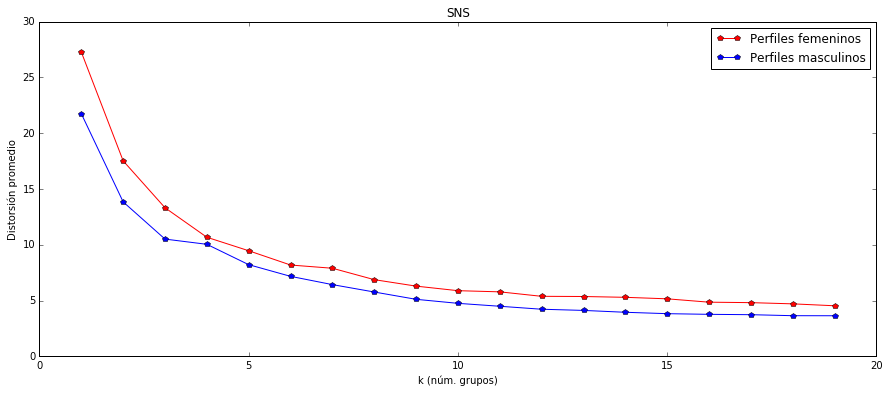

In [5]:
# Importamos librerías
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

# Asignamos inicialmente el número máximo de grupos
maxK = 20

# Iniciamos los datos de distorsiones promedio
meandistF = []
meandistM = []

# Realizamos los cálculos
for k in range(1, maxK):

    kmeansF = KMeans(n_clusters = k, n_init = 10).fit(snsdataF)
    meandistF.append(sum(np.min(cdist(snsdataF, kmeansF.cluster_centers_, 'euclidean'), axis = 1)) / snsdataF.shape[0])

    kmeansM = KMeans(n_clusters = k, n_init = 10).fit(snsdataM)
    meandistM.append(sum(np.min(cdist(snsdataM, kmeansM.cluster_centers_, 'euclidean'), axis = 1)) / snsdataM.shape[0])

# Mostramos la gráfica para los perfiles femeninos
plot(range(1, maxK), meandistF, 'rp-', label = ('Perfiles femeninos'))
plot(range(1, maxK), meandistM, 'bp-', label = ('Perfiles masculinos'))
xlabel(u'k (núm. grupos)')
ylabel(u'Distorsión promedio')
title('SNS')
plt.legend()


- Numero de clústers en el grupo femenino: **7**
- Numero de clústers en el grupo masculino: **4**

Ahora podemos obtener la posición de los centroides de cada grupo:

In [6]:
# Centroides para el grupo de datos de perfiles femeninos
kmeans = KMeans(n_clusters = 7, n_init = 10).fit(snsdataF)
kmeans.cluster_centers_

array([[  2.55153404e+01,   2.72930649e-01,   2.19878555e-01,
          2.61744966e-01,   1.96069032e-01,   1.93512304e-01,
          1.57398530e-01,   1.37104506e-01,   6.83924577e-02,
          9.14030042e-02,   1.33908597e-01,   4.01725791e-01,
          2.34579738e-01,   1.58197507e-01,   1.49728348e-01,
          1.15212528e-01,   5.04314477e-01,   3.42921061e-01,
          4.36241611e-02,   8.27900288e-01,   2.63023330e-01,
          4.75391499e-01,   2.68935762e-01,   1.11377437e-01,
          2.23713647e-02,   4.98881432e-01,   1.40140620e-01,
          1.00511345e-01,   2.82837967e-01,   4.41355066e-01,
          1.70981144e-01,   7.25471397e-02,   5.52892298e-02,
          1.89996804e-01,   1.24161074e-01,   9.92329818e-02,
          6.00830936e-02],
       [  2.36309353e+02,   3.45323741e-01,   2.15827338e-01,
          3.16546763e-01,   2.30215827e-01,   2.15827338e-01,
          2.23021583e-01,   1.51079137e-01,   1.15107914e-01,
          1.07913669e-01,   1.36690647e-01,

In [7]:
# Centroides para el grupo de datos de perfiles masculinos
kmeans = KMeans(n_clusters = 4, n_init = 10).fit(snsdataM)
kmeans.cluster_centers_

array([[  4.13470919e+01,   3.50218887e-01,   4.65290807e-01,
          2.27642276e-01,   1.00062539e-02,   4.31519700e-02,
          8.81801126e-02,   6.87929956e-03,   2.85803627e-01,
          1.20700438e-01,   2.12007505e-01,   8.81801126e-02,
          1.65728580e-01,   8.13008130e-02,   5.25328330e-02,
          7.19199500e-02,   2.27016886e-01,   4.28392745e-01,
          6.44152595e-02,   8.02376485e-01,   2.88305191e-01,
          4.35272045e-01,   2.23264540e-01,   1.50719199e-01,
          2.87679800e-02,   1.84490306e-01,   3.18949343e-02,
          3.06441526e-02,   1.60100063e-01,   6.37898687e-02,
          8.00500313e-02,   4.12757974e-02,   2.50156348e-02,
          1.80737961e-01,   1.03189493e-01,   8.38023765e-02,
          5.12820513e-02],
       [  9.97768817e+01,   4.08602151e-01,   4.67741935e-01,
          2.98387097e-01,   3.49462366e-02,   6.18279570e-02,
          7.79569892e-02,   2.41935484e-02,   4.32795699e-01,
          1.90860215e-01,   2.12365591e-01,

***
# 2. Componentes principales.
***

## Enunciado.

En el archivo “concrete.csv” se encuentra los datos de diferentes mezclas de hormigón.
- Utilizar el análisis de componentes principales y obtener el número de componentes principales con los que se puede explicar el 50%, 75% y 90% de la varianza.
- Obtener el porcentaje de la varianza que explica la primera componente principal.

## 2.1 Cargamos los datos del fichero CSV.

In [8]:
# Cargamos el fichero CSV con los datos de los mezclas de hormigón
concrete = pd.read_csv('data2/concrete.csv', sep=',')
print '- Los datos de perfiles se cargan en la variable: concrete'
print '- La variable concrete es de tipo:', type(concrete)
print '- La variable concrete tiene', len(concrete), "filas (mezclas de hormigón)."
print '- Columnas de la variable concrete:'
for label in concrete.columns:
    print '     - ', label
print '\n- Primeras filas de datos:\n'
concrete.head(5)

- Los datos de perfiles se cargan en la variable: concrete
- La variable concrete es de tipo: <class 'pandas.core.frame.DataFrame'>
- La variable concrete tiene 1030 filas (mezclas de hormigón).
- Columnas de la variable concrete:
     -  cement
     -  slag
     -  ash
     -  water
     -  superplastic
     -  coarseagg
     -  fineagg
     -  age
     -  strength

- Primeras filas de datos:



,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


## 2.1 Análisis de Componentes Principales (PCA)

La técnica de Análisis de Componentes Principales (PCA) se utiliza para reducir la dimensión (número de variables). Permite seleccionar las componentes que explican la mayor variabilidad.

PCA calcula los vectores propios de la matriz de covarianza (ejes principales) y los ordena por sus autovalores (cantidad de varianza explicada).

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
pca.fit_transform(concrete)

# Valores explicativos por componente
print '\n* Valores explicativos de las variables:\n', pca.explained_variance_ratio_

# Porcentaje de explicación de la varianza por compomente
print u'\n* Porcentaje de explicación de la varianza por componente:'
for x in range(len(pca.explained_variance_ratio_)):
    value = pca.explained_variance_ratio_[x] * 100
    print '- La variable', str(x+1), 'explica el %2.2f%% de la varianza las mezclas.' % value

# Nº de componentes y porcentaje de explicación de la varianza
print u'\n* Nº de componentes y porcentaje de explicación de la varianza:'
cs = cumsum(pca.explained_variance_ratio_)
for x in range(len(cs)):
    txtvar = ' variable' + ('s' if x>0 else '')
    txtexp = ' explica' + ('n' if x>0 else '')
    print '- ' + str(x+1) + txtvar + txtexp + ' el %2.2f%% de la varianza las mezclas.' % (100.0 * cs[x])

# Porcentaje de la varianza que explica la primera componente principal
print '\n* Porcentaje de la varianza que explica la primera componente principal:'
print '- La primera componente principal explica el %2.2f%% de la varianza las mezclas.' % (100.0 * cs[0])

# Nº de componentes principales con los que se puede explicar un X% de la varianza
print u'\n* Nº de componentes principales con los que se puede explicar un X% de la varianza:'
for x in [50, 75, 90]:
    txt = '- El ' + str(x)+ '% de la varianza de las mezclas puede explicarse con'
    print txt, (cs > x/100.0).tolist().index(True) + 1,"variables."



* Valores explicativos de las variables:
[  3.24912982e-01   2.47520147e-01   1.83572018e-01   1.07002273e-01
   1.00435063e-01   3.19457909e-02   2.57127990e-03   1.75682732e-03
   2.83619093e-04]

* Porcentaje de explicación de la varianza por componente:
- La variable 1 explica el 32.49% de la varianza las mezclas.
- La variable 2 explica el 24.75% de la varianza las mezclas.
- La variable 3 explica el 18.36% de la varianza las mezclas.
- La variable 4 explica el 10.70% de la varianza las mezclas.
- La variable 5 explica el 10.04% de la varianza las mezclas.
- La variable 6 explica el 3.19% de la varianza las mezclas.
- La variable 7 explica el 0.26% de la varianza las mezclas.
- La variable 8 explica el 0.18% de la varianza las mezclas.
- La variable 9 explica el 0.03% de la varianza las mezclas.

* Nº de componentes y porcentaje de explicación de la varianza:
- 1 variable explica el 32.49% de la varianza las mezclas.
- 2 variables explican el 57.24% de la varianza las mezclas.
- 

***
# 3. Regresión de una función con Theano
***

## Enunciado.

Crear un conjunto de datos utilizando el siguiente código:
```
    trX = np.linspace(-1, 1, 101)
    trY = np.linspace(-1, 1, 101)
    for i in range(len(trY)):
        trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033
```
Ahora utilizar Theano para obtener los parámetros w_0 y w_1 del siguiente modelo:

$$ y = \log(1 + w_0  |x|) + w_1  x, $$

utilizando los datos generados anteriormente.

## 3.1 Resolución.

In [10]:
# Creamos el conjunto de datos
trX = np.linspace(-1, 1, 101)
trY = np.linspace(-1, 1, 101)
for i in range(len(trY)):
    trY[i] = math.log(1 + 0.5 * abs(trX[i])) + trX[i] / 3 + np.random.randn() * 0.033

In [11]:
import theano
import theano.tensor as T

X = T.scalar()
Y = T.scalar()

# Modelo
def model(X, w0, w1):
    return T.log(1 + w0 * abs(X)) + w1 * X

w0 = theano.shared(np.asarray(0., dtype=theano.config.floatX))
w1 = theano.shared(np.asarray(0., dtype=theano.config.floatX))
y = model(X, w0, w1)

# Coste
cost = T.mean(T.sqr(y - Y))

# Gradientes
gradient0 = T.grad(cost = cost, wrt = w0)
gradient1 = T.grad(cost = cost, wrt = w1)
updates = [[w0, w0 - gradient0 * 0.01], [w1, w1 - gradient1 * 0.01]]

# Entrenamiento
train = theano.function(inputs = [X, Y], outputs = cost, updates = updates)

for i in range(10):
    for x, y in zip(trX, trY):
        train(x, y)
    print '- Iteración', i, '-> w0 =', w0.get_value(), '\t w1 =', w1.get_value()

- Iteración 0 -> w0 = 0.203313417583 	 w1 = 0.163259615931
- Iteración 1 -> w0 = 0.310751448577 	 w1 = 0.24659323466
- Iteración 2 -> w0 = 0.376162392229 	 w1 = 0.28740950258
- Iteración 3 -> w0 = 0.418382963449 	 w1 = 0.306891179208
- Iteración 4 -> w0 = 0.446445563408 	 w1 = 0.315910684655
- Iteración 5 -> w0 = 0.465403104444 	 w1 = 0.319898195184
- Iteración 6 -> w0 = 0.478332761843 	 w1 = 0.321522941674
- Iteración 7 -> w0 = 0.487203033207 	 w1 = 0.322077127032
- Iteración 8 -> w0 = 0.493310913444 	 w1 = 0.322174368809
- Iteración 9 -> w0 = 0.497526653544 	 w1 = 0.322097977076


## Enlaces relacionados

- [Deep Learning Tutorial](http://deeplearning.net/tutorial/deeplearning.pdf)
- [Un ejemplo sencillo sobre Análisis de Componentes Principales (PCA, Principal Component Analysis)](https://dlegorreta.wordpress.com/2015/03/13/un-ejemplo-sencillo-sobre-analisis-de-componentes-principalespca-principal-components-analysis/)